Author : Clara Martinez

Week 4 - Day 3

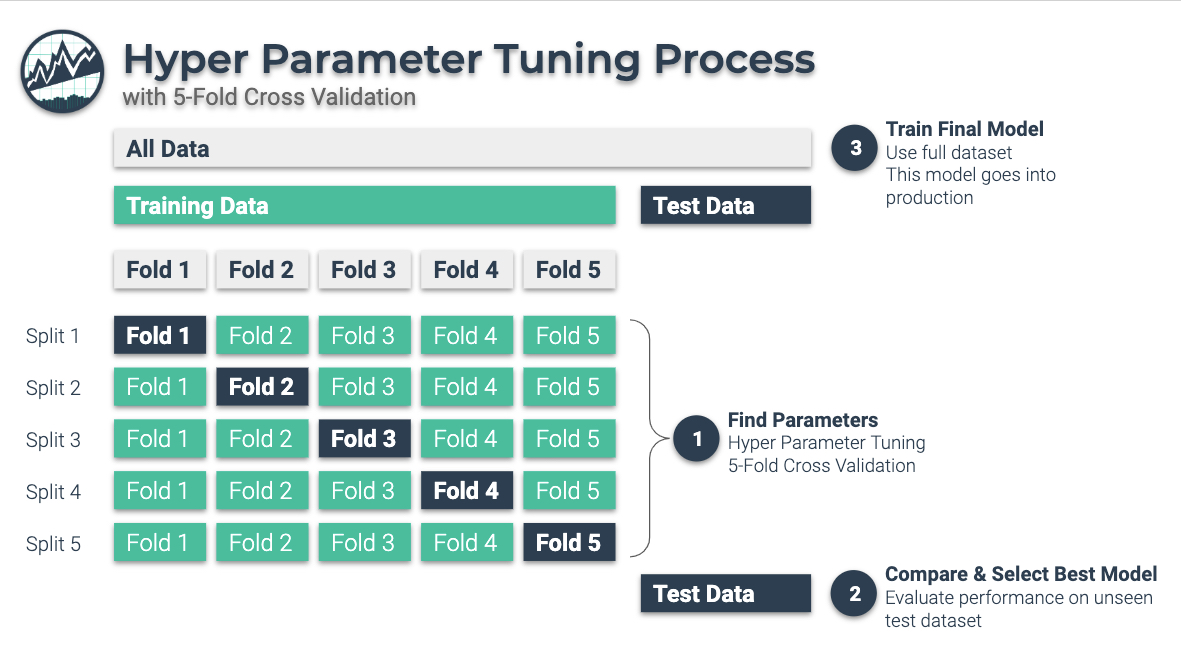

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Colab\ Notebooks/

 AABA_2006-01-01_to_2018-01-01.csv  'Flower Classification.zip'   w4d2.ipynb   w4d3.ipynb


Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

Load the dataset

In [5]:
from google.colab import files
uploaded = files.upload()

Saving AABA_2006-01-01_to_2018-01-01.csv to AABA_2006-01-01_to_2018-01-01.csv


In [6]:
dataset = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


Splitting the data into training and test sets

In [7]:
training_set = dataset[:'2016'].iloc[:, 1:2].values  # Using the 'High' column
test_set = dataset['2017':].iloc[:, 1:2].values

This uses the iloc indexer to select specific columns. Here, 1:2 means we are selecting the second column (index 1) of the dataset. The iloc indexer is zero-based, so 1:2 selects the column at index 1. The use of 1:2 instead of just 1 ensures that the result is a DataFrame with one column, rather than a Series.

.values: This converts the selected DataFrame column into a NumPy array. This is often done to facilitate further numerical operations or to prepare the data for input into machine learning models.

Mise à l'échelle des données - Normalisation

In [8]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

Préparation des données pour les RNNs

In [9]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape des données

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Construction et entraînement du modèle LSTM

In [11]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=50, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - loss: 0.0303
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - loss: 0.0070
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - loss: 0.0056
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - loss: 0.0052
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0042
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0042
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - loss: 0.0040
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - loss: 0.0036
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0034
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 0.0031
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - loss: 0.0030
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0027
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - loss: 0.0027
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 164ms/step - loss: 0.0023
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 1

Préparation des données de test

In [12]:
dataset_total = pd.concat((dataset["High"][:'2016'], dataset["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Prédictions avec le modèle LSTM

In [13]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step


Visualisation des résultats

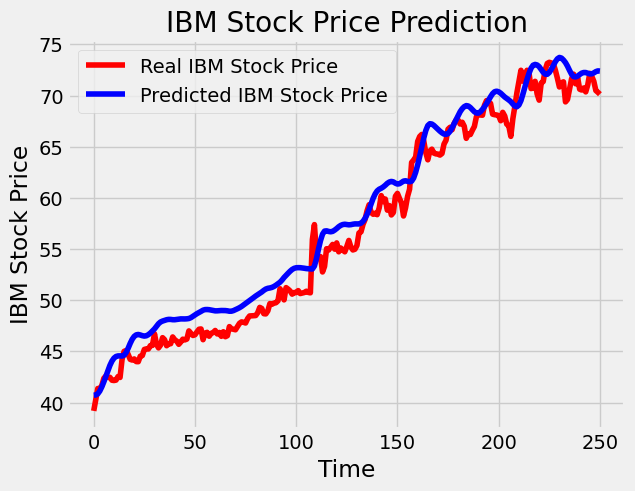

In [14]:
def plot_predictions(test, predicted):
    plt.plot(test, color='red', label='Real IBM Stock Price')
    plt.plot(predicted, color='blue', label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

plot_predictions(test_set, predicted_stock_price)

Évaluation du modèle

In [15]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

return_rmse(test_set, predicted_stock_price)

The root mean squared error is 1.8923961540260428.


Construction et entraînement du modèle GRU

In [17]:
from keras.layers import Input

# Building and training the GRU model with updated optimizer parameters
regressorGRU = Sequential()

# First GRU layer with Dropout regularization
regressorGRU.add(Input(shape=(X_train.shape[1], 1)))
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Output layer
regressorGRU.add(Dense(units=1))

# Compiling the model with updated optimizer parameters
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False), loss='mean_squared_error')

# Training the model
regressorGRU.fit(X_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 278ms/step - loss: 0.1072
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 311ms/step - loss: 0.0414
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - loss: 0.0178
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 274ms/step - loss: 0.0041
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 327ms/step - loss: 0.0034
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - loss: 0.0032
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 370ms/step - loss: 0.0028
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 332ms/step - loss: 0.0028
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 343ms/step - loss: 0.0026
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 381ms/step - loss: 0.0026
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - loss: 0.0027
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - loss: 0.0026
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - loss: 0.0026
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - loss: 0.0023
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 277ms/st

# Prédictions avec le modèle GRU

In [18]:
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step


Visualisation des résultats GRU

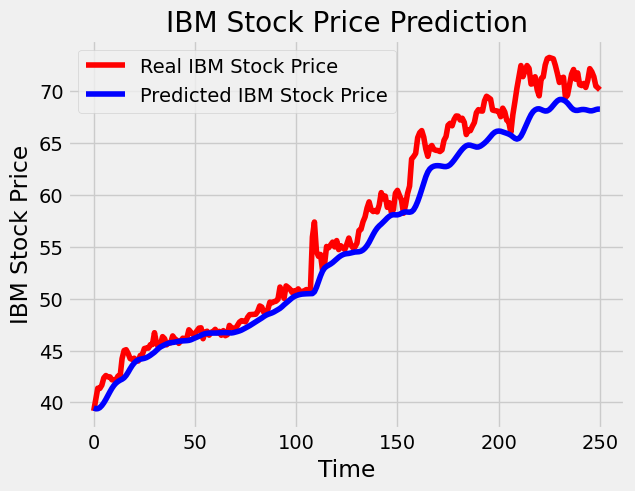

In [19]:
plot_predictions(test_set, GRU_predicted_stock_price)

Évaluation du modèle GRU

In [20]:
return_rmse(test_set, GRU_predicted_stock_price)

The root mean squared error is 2.386760246746074.



The root mean squared error (RMSE) is a measure of the differences between predicted and actual values. It provides an indication of how well a model's predictions match the actual data.RMSE is a measure of error, so lower values indicate better model performance. It means the model's predictions are closer to the actual values. LSTM performs better than GRU.